In [2]:
# IMPORTS
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [4]:
# read in data
df_og = pd.read_csv("heart_2020_cleaned.csv")
df_og.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
#counts for whether coin trades or not
df_og.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [7]:
# Heart Disease Counts
NoDisease_count, Disease_count = df_og.HeartDisease.value_counts()

# Separate the yes and no
NoDisease = df_og[df_og['HeartDisease'] == 'No']
Disease = df_og[df_og['HeartDisease'] == 'Yes']

# print the shape
print('class No Disease:', NoDisease.shape)
print('class Disease:', Disease.shape)

class No Disease: (292422, 18)
class Disease: (27373, 18)


total class of 1 and0: No     27373
Yes    27373
Name: HeartDisease, dtype: int64


<AxesSubplot:title={'center':'count (DataSample)'}>

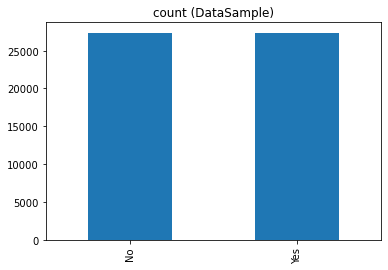

In [8]:
NoDisease_under = NoDisease.sample(Disease_count)

df = pd.concat([NoDisease_under, Disease], axis=0)

print("total class of 1 and0:",df['HeartDisease'].value_counts())

# plot the count after under-sampeling
df['HeartDisease'].value_counts().plot(kind='bar', title='count (DataSample)')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 307009 to 319790
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      54746 non-null  object 
 1   BMI               54746 non-null  float64
 2   Smoking           54746 non-null  object 
 3   AlcoholDrinking   54746 non-null  object 
 4   Stroke            54746 non-null  object 
 5   PhysicalHealth    54746 non-null  float64
 6   MentalHealth      54746 non-null  float64
 7   DiffWalking       54746 non-null  object 
 8   Sex               54746 non-null  object 
 9   AgeCategory       54746 non-null  object 
 10  Race              54746 non-null  object 
 11  Diabetic          54746 non-null  object 
 12  PhysicalActivity  54746 non-null  object 
 13  GenHealth         54746 non-null  object 
 14  SleepTime         54746 non-null  float64
 15  Asthma            54746 non-null  object 
 16  KidneyDisease     54746 non-null  

In [10]:
str_cols = []

for col in df.columns:
    if (df[col].dtype == object) & (col != "HeartDisease"):
        print(col)
        str_cols.append(col)
        
df_str = df.loc[:, str_cols]
df_str.head()

Smoking
AlcoholDrinking
Stroke
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
Asthma
KidneyDisease
SkinCancer


,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
307009,Yes,No,No,No,Female,40-44,White,No,Yes,Excellent,No,No,No
210641,Yes,No,No,No,Male,40-44,Asian,No,Yes,Very good,No,No,No
261623,Yes,No,No,No,Male,55-59,Other,No,Yes,Excellent,No,No,No
207283,No,No,No,No,Male,45-49,Other,No,Yes,Very good,No,No,No
254505,Yes,No,No,Yes,Male,35-39,White,No,Yes,Good,No,No,No


In [11]:
for col in df_str.columns:
    print(col)
    print(df_str[col].value_counts())
    print()

Smoking
No     27817
Yes    26929
Name: Smoking, dtype: int64

AlcoholDrinking
No     51631
Yes     3115
Name: AlcoholDrinking, dtype: int64

Stroke
No     49642
Yes     5104
Name: Stroke, dtype: int64

DiffWalking
No     41608
Yes    13138
Name: DiffWalking, dtype: int64

Sex
Male      28822
Female    25924
Name: Sex, dtype: int64

AgeCategory
70-74          7338
80 or older    7212
65-69          6904
60-64          6228
75-79          5641
55-59          4745
50-54          3714
45-49          2754
40-44          2354
35-39          2211
18-24          1996
30-34          1992
25-29          1657
Name: AgeCategory, dtype: int64

Race
White                             43251
Hispanic                           3974
Black                              3746
Other                              1858
Asian                               966
American Indian/Alaskan Native      951
Name: Race, dtype: int64

Diabetic
No                         41037
Yes                        12032
No, borderline

In [12]:
df_str_label = df_str.copy()

In [13]:
df_str_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 307009 to 319790
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Smoking           54746 non-null  object
 1   AlcoholDrinking   54746 non-null  object
 2   Stroke            54746 non-null  object
 3   DiffWalking       54746 non-null  object
 4   Sex               54746 non-null  object
 5   AgeCategory       54746 non-null  object
 6   Race              54746 non-null  object
 7   Diabetic          54746 non-null  object
 8   PhysicalActivity  54746 non-null  object
 9   GenHealth         54746 non-null  object
 10  Asthma            54746 non-null  object
 11  KidneyDisease     54746 non-null  object
 12  SkinCancer        54746 non-null  object
dtypes: object(13)
memory usage: 5.8+ MB


In [14]:
df_str_label.columns

Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [15]:
# df_str_label2 = pd.get_dummies(df_str_label.loc[:, ["AgeCategory", "Race", "Diabetic", "GenHealth"]])
# df_str_label2.head()

In [16]:
#categorial
le = LabelEncoder()
col1 = df_str_label[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]
for i in col1:
  df_str_label[i] = le.fit_transform(df_str_label[i])
df_str_label.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
307009,1,0,0,0,0,40-44,White,No,1,Excellent,0,0,0
210641,1,0,0,0,1,40-44,Asian,No,1,Very good,0,0,0
261623,1,0,0,0,1,55-59,Other,No,1,Excellent,0,0,0
207283,0,0,0,0,1,45-49,Other,No,1,Very good,0,0,0
254505,1,0,0,1,1,35-39,White,No,1,Good,0,0,0


In [17]:
df1 = df_str_label[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 307009 to 319790
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Smoking           54746 non-null  int32
 1   AlcoholDrinking   54746 non-null  int32
 2   Stroke            54746 non-null  int32
 3   DiffWalking       54746 non-null  int32
 4   Sex               54746 non-null  int32
 5   PhysicalActivity  54746 non-null  int32
 6   Asthma            54746 non-null  int32
 7   KidneyDisease     54746 non-null  int32
 8   SkinCancer        54746 non-null  int32
dtypes: int32(9)
memory usage: 2.3 MB


In [21]:
df_str_dum = pd.get_dummies(df_str_label.loc[:, ["AgeCategory", "Race", "Diabetic", "GenHealth"]])
df_str_dum.head()

,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
307009,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
210641,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
261623,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
207283,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
254505,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0


In [22]:
df_str_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 307009 to 319790
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   AgeCategory_18-24                    54746 non-null  uint8
 1   AgeCategory_25-29                    54746 non-null  uint8
 2   AgeCategory_30-34                    54746 non-null  uint8
 3   AgeCategory_35-39                    54746 non-null  uint8
 4   AgeCategory_40-44                    54746 non-null  uint8
 5   AgeCategory_45-49                    54746 non-null  uint8
 6   AgeCategory_50-54                    54746 non-null  uint8
 7   AgeCategory_55-59                    54746 non-null  uint8
 8   AgeCategory_60-64                    54746 non-null  uint8
 9   AgeCategory_65-69                    54746 non-null  uint8
 10  AgeCategory_70-74                    54746 non-null  uint8
 11  AgeCategory_75-79                    54746 non-n

In [23]:
df_str1 = pd.concat([df1, df_str_dum], axis=1,)

In [25]:
df_str1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 307009 to 319790
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Smoking                              54746 non-null  int32
 1   AlcoholDrinking                      54746 non-null  int32
 2   Stroke                               54746 non-null  int32
 3   DiffWalking                          54746 non-null  int32
 4   Sex                                  54746 non-null  int32
 5   PhysicalActivity                     54746 non-null  int32
 6   Asthma                               54746 non-null  int32
 7   KidneyDisease                        54746 non-null  int32
 8   SkinCancer                           54746 non-null  int32
 9   AgeCategory_18-24                    54746 non-null  uint8
 10  AgeCategory_25-29                    54746 non-null  uint8
 11  AgeCategory_30-34                    54746 non-n

In [26]:
num_cols = []

for col in df.columns:
    if (df[col].dtype != object) & (col != "HeartDisease"):
        print(col)
        num_cols.append(col)
        
df_num = df.loc[:, num_cols]
df_num.head()

BMI
PhysicalHealth
MentalHealth
SleepTime


,BMI,PhysicalHealth,MentalHealth,SleepTime
307009,24.96,14.0,0.0,8.0
210641,26.61,0.0,0.0,8.0
261623,35.95,3.0,30.0,5.0
207283,33.96,30.0,0.0,8.0
254505,28.34,10.0,0.0,6.0


In [27]:
df_num.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,54746.000000,54746.000000,54746.000000,54746.000000
mean,28.819232,5.407135,4.225094,7.117744
std,6.496570,9.987136,8.547439,1.606721
min,12.020000,0.000000,0.000000,1.000000
25%,24.390000,0.000000,0.000000,6.000000
50%,27.730000,0.000000,0.000000,7.000000
75%,32.020000,5.000000,3.000000,8.000000
max,87.050000,30.000000,30.000000,24.000000


In [28]:
df_no_scale = df_num.copy()

In [29]:
df_num.drop('SleepTime', axis=1, inplace=True)

In [30]:
df_num.head()

,BMI,PhysicalHealth,MentalHealth
307009,24.96,14.0,0.0
210641,26.61,0.0,0.0
261623,35.95,3.0,30.0
207283,33.96,30.0,0.0
254505,28.34,10.0,0.0


In [35]:
Scaler = StandardScaler()
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth']

df_num[num_cols] = Scaler.fit_transform(df_num[num_cols])

In [37]:
df_scale=df_num.copy()

In [31]:
scaler = StandardScaler().fit(df_num)
df_scale = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)
df_scale.head()

,BMI,PhysicalHealth,MentalHealth
0,-0.594047,0.860401,-0.494316
1,-0.340064,-0.541415,-0.494316
2,1.097630,-0.241026,3.015540
3,0.791312,2.462477,-0.494316
4,-0.073768,0.459882,-0.494316


In [38]:
df_train_scale = pd.concat([df_scale, df_str1], axis=1)

In [39]:
df_train_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 307009 to 319790
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   BMI                                  54746 non-null  float64
 1   PhysicalHealth                       54746 non-null  float64
 2   MentalHealth                         54746 non-null  float64
 3   Smoking                              54746 non-null  int32  
 4   AlcoholDrinking                      54746 non-null  int32  
 5   Stroke                               54746 non-null  int32  
 6   DiffWalking                          54746 non-null  int32  
 7   Sex                                  54746 non-null  int32  
 8   PhysicalActivity                     54746 non-null  int32  
 9   Asthma                               54746 non-null  int32  
 10  KidneyDisease                        54746 non-null  int32  
 11  SkinCancer            

In [40]:
# scale training set
df_train_scale = pd.concat([df_scale, df_str1], axis=1)
df_train_scale["HeartDisease"] = df.HeartDisease

df_train_scale["HeartDisease"] = [1 if x == "Yes" else 0 for x in df_train_scale.HeartDisease]
df_train_scale.head()

,BMI,PhysicalHealth,MentalHealth,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,HeartDisease
307009,-0.594047,0.860401,-0.494316,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
210641,-0.340064,-0.541415,-0.494316,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
261623,1.097630,-0.241026,3.015540,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
207283,0.791312,2.462477,-0.494316,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
254505,-0.073768,0.459882,-0.494316,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0


In [51]:
df_train_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 307009 to 319790
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   BMI                                  54746 non-null  float64
 1   PhysicalHealth                       54746 non-null  float64
 2   MentalHealth                         54746 non-null  float64
 3   Smoking                              54746 non-null  int32  
 4   AlcoholDrinking                      54746 non-null  int32  
 5   Stroke                               54746 non-null  int32  
 6   DiffWalking                          54746 non-null  int32  
 7   Sex                                  54746 non-null  int32  
 8   PhysicalActivity                     54746 non-null  int32  
 9   Asthma                               54746 non-null  int32  
 10  KidneyDisease                        54746 non-null  int32  
 11  SkinCancer            

In [41]:
corrs = abs(df_train_scale.corr())["HeartDisease"].sort_values(ascending=False)
corrs

HeartDisease                           1.000000
DiffWalking                            0.295888
Diabetic_Yes                           0.259460
Diabetic_No                            0.252923
PhysicalHealth                         0.240422
GenHealth_Excellent                    0.238261
Stroke                                 0.230812
GenHealth_Fair                         0.216521
GenHealth_Poor                         0.212371
AgeCategory_80 or older                0.199079
GenHealth_Very good                    0.192874
Smoking                                0.187984
KidneyDisease                          0.182632
AgeCategory_18-24                      0.169184
PhysicalActivity                       0.165216
AgeCategory_30-34                      0.150227
AgeCategory_35-39                      0.150220
AgeCategory_25-29                      0.148308
AgeCategory_75-79                      0.147626
SkinCancer                             0.143674
Sex                                    0

In [42]:
corrs = abs(df_train_scale.corr())["HeartDisease"].sort_values(ascending=False)
corrs

HeartDisease                           1.000000
DiffWalking                            0.295888
Diabetic_Yes                           0.259460
Diabetic_No                            0.252923
PhysicalHealth                         0.240422
GenHealth_Excellent                    0.238261
Stroke                                 0.230812
GenHealth_Fair                         0.216521
GenHealth_Poor                         0.212371
AgeCategory_80 or older                0.199079
GenHealth_Very good                    0.192874
Smoking                                0.187984
KidneyDisease                          0.182632
AgeCategory_18-24                      0.169184
PhysicalActivity                       0.165216
AgeCategory_30-34                      0.150227
AgeCategory_35-39                      0.150220
AgeCategory_25-29                      0.148308
AgeCategory_75-79                      0.147626
SkinCancer                             0.143674
Sex                                    0

In [43]:
# get features and target
X = df_train_scale.drop(["HeartDisease", "AgeCategory_55-59", "Race_Other","Diabetic_Yes (during pregnancy)", "GenHealth_Good"], axis=1).values
y = df_train_scale["HeartDisease"].values

In [44]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7499908669126512
0.25000913308734884


In [45]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

TRAINING SET
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     20548
           1       0.76      0.78      0.77     20511

    accuracy                           0.76     41059
   macro avg       0.77      0.76      0.76     41059
weighted avg       0.77      0.76      0.76     41059

[[15379  5169]
 [ 4490 16021]]

Testing SET
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6825
           1       0.76      0.78      0.77      6862

    accuracy                           0.76     13687
   macro avg       0.76      0.76      0.76     13687
weighted avg       0.76      0.76      0.76     13687

[[5103 1722]
 [1541 5321]]


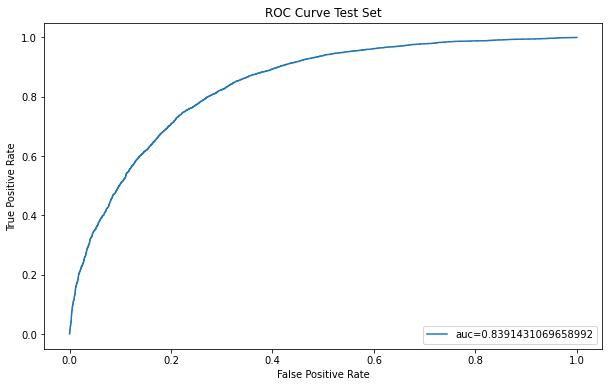

In [46]:
# Initialize the model
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     20548
           1       0.79      0.83      0.81     20511

    accuracy                           0.81     41059
   macro avg       0.81      0.81      0.81     41059
weighted avg       0.81      0.81      0.81     41059

[[16003  4545]
 [ 3418 17093]]

Testing SET
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      6825
           1       0.75      0.79      0.77      6862

    accuracy                           0.76     13687
   macro avg       0.76      0.76      0.76     13687
weighted avg       0.76      0.76      0.76     13687

[[5025 1800]
 [1468 5394]]


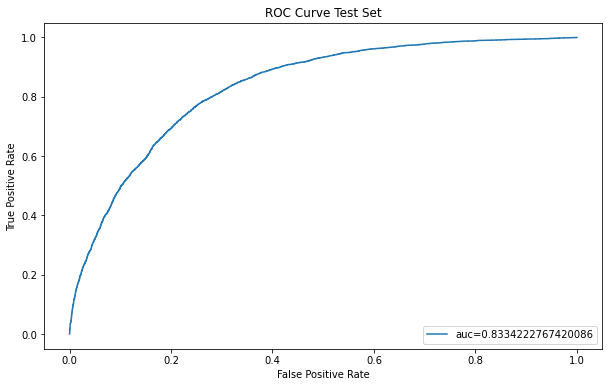

In [47]:
lr = XGBClassifier()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.81      0.73      0.77     20548
           1       0.76      0.82      0.79     20511

    accuracy                           0.78     41059
   macro avg       0.78      0.78      0.78     41059
weighted avg       0.78      0.78      0.78     41059

[[15087  5461]
 [ 3651 16860]]

Testing SET
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      6825
           1       0.75      0.81      0.78      6862

    accuracy                           0.77     13687
   macro avg       0.77      0.77      0.77     13687
weighted avg       0.77      0.77      0.77     13687

[[4956 1869]
 [1329 5533]]


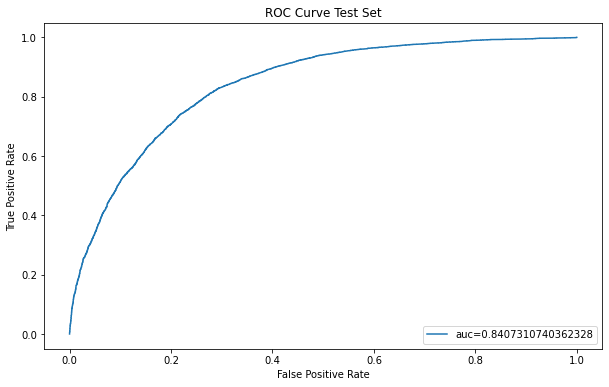

In [48]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     20548
           1       0.76      0.78      0.77     20511

    accuracy                           0.76     41059
   macro avg       0.76      0.76      0.76     41059
weighted avg       0.76      0.76      0.76     41059

[[15402  5146]
 [ 4573 15938]]

Testing SET
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      6825
           1       0.76      0.77      0.76      6862

    accuracy                           0.76     13687
   macro avg       0.76      0.76      0.76     13687
weighted avg       0.76      0.76      0.76     13687

[[5112 1713]
 [1579 5283]]


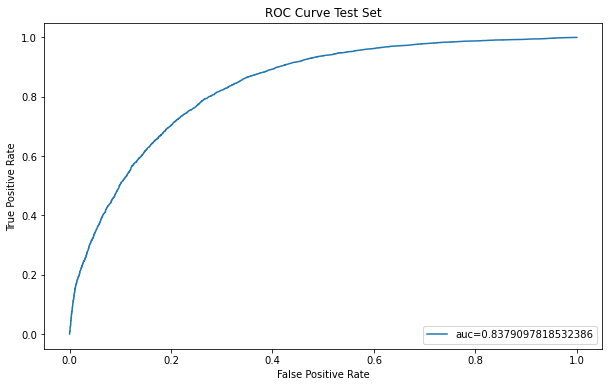

In [49]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20548
           1       0.99      0.99      0.99     20511

    accuracy                           0.99     41059
   macro avg       0.99      0.99      0.99     41059
weighted avg       0.99      0.99      0.99     41059

[[20397   151]
 [  180 20331]]

Testing SET
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      6825
           1       0.72      0.75      0.73      6862

    accuracy                           0.73     13687
   macro avg       0.73      0.73      0.73     13687
weighted avg       0.73      0.73      0.73     13687

[[4826 1999]
 [1726 5136]]


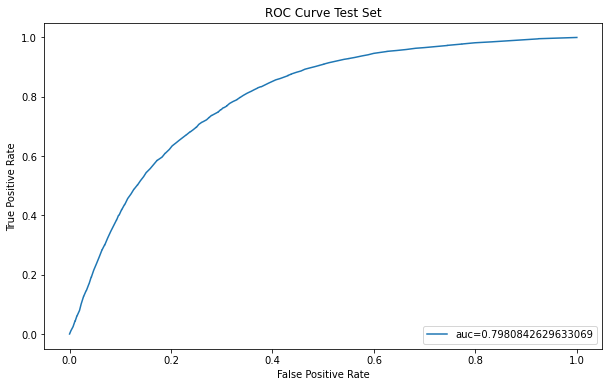

In [50]:
randomForest = RandomForestClassifier(random_state=42)
randomForest = evaluateModel(randomForest, X_train, y_train, X_test, y_test)

In [ ]:
#first Machine Learning attempt determined that Random Forest 
#is our best model to determine if a patient has heart disease or not